In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,2"

In [2]:
import torch
import linear_rep_geometry as lrg

device = torch.device("cuda:0")

g = torch.load('matrices/g.pt').to(device)
concept_g = torch.load('matrices/concept_g.pt').to(device)
sqrt_Cov_gamma = torch.load("matrices/sqrt_Cov_gamma.pt").to(device)
W, d = g.shape

concept_names = []
with open('matrices/concept_names.txt', 'r') as f:
    for line in f.readlines():
        concept_names.append(line.strip())

/mount/studenten/arbeitsdaten-studenten1/shencg/condaenvs/xmmspatialembedding/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [00:25<00:00, 12.59s/it]


In [3]:
filenames = [
    "paired_contexts/en-fr.jsonl",
    "paired_contexts/fr-de.jsonl",
    "paired_contexts/fr-es.jsonl",
    "paired_contexts/es-de.jsonl"
]

0it [00:00, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
20it [00:52,  2.61s/it]


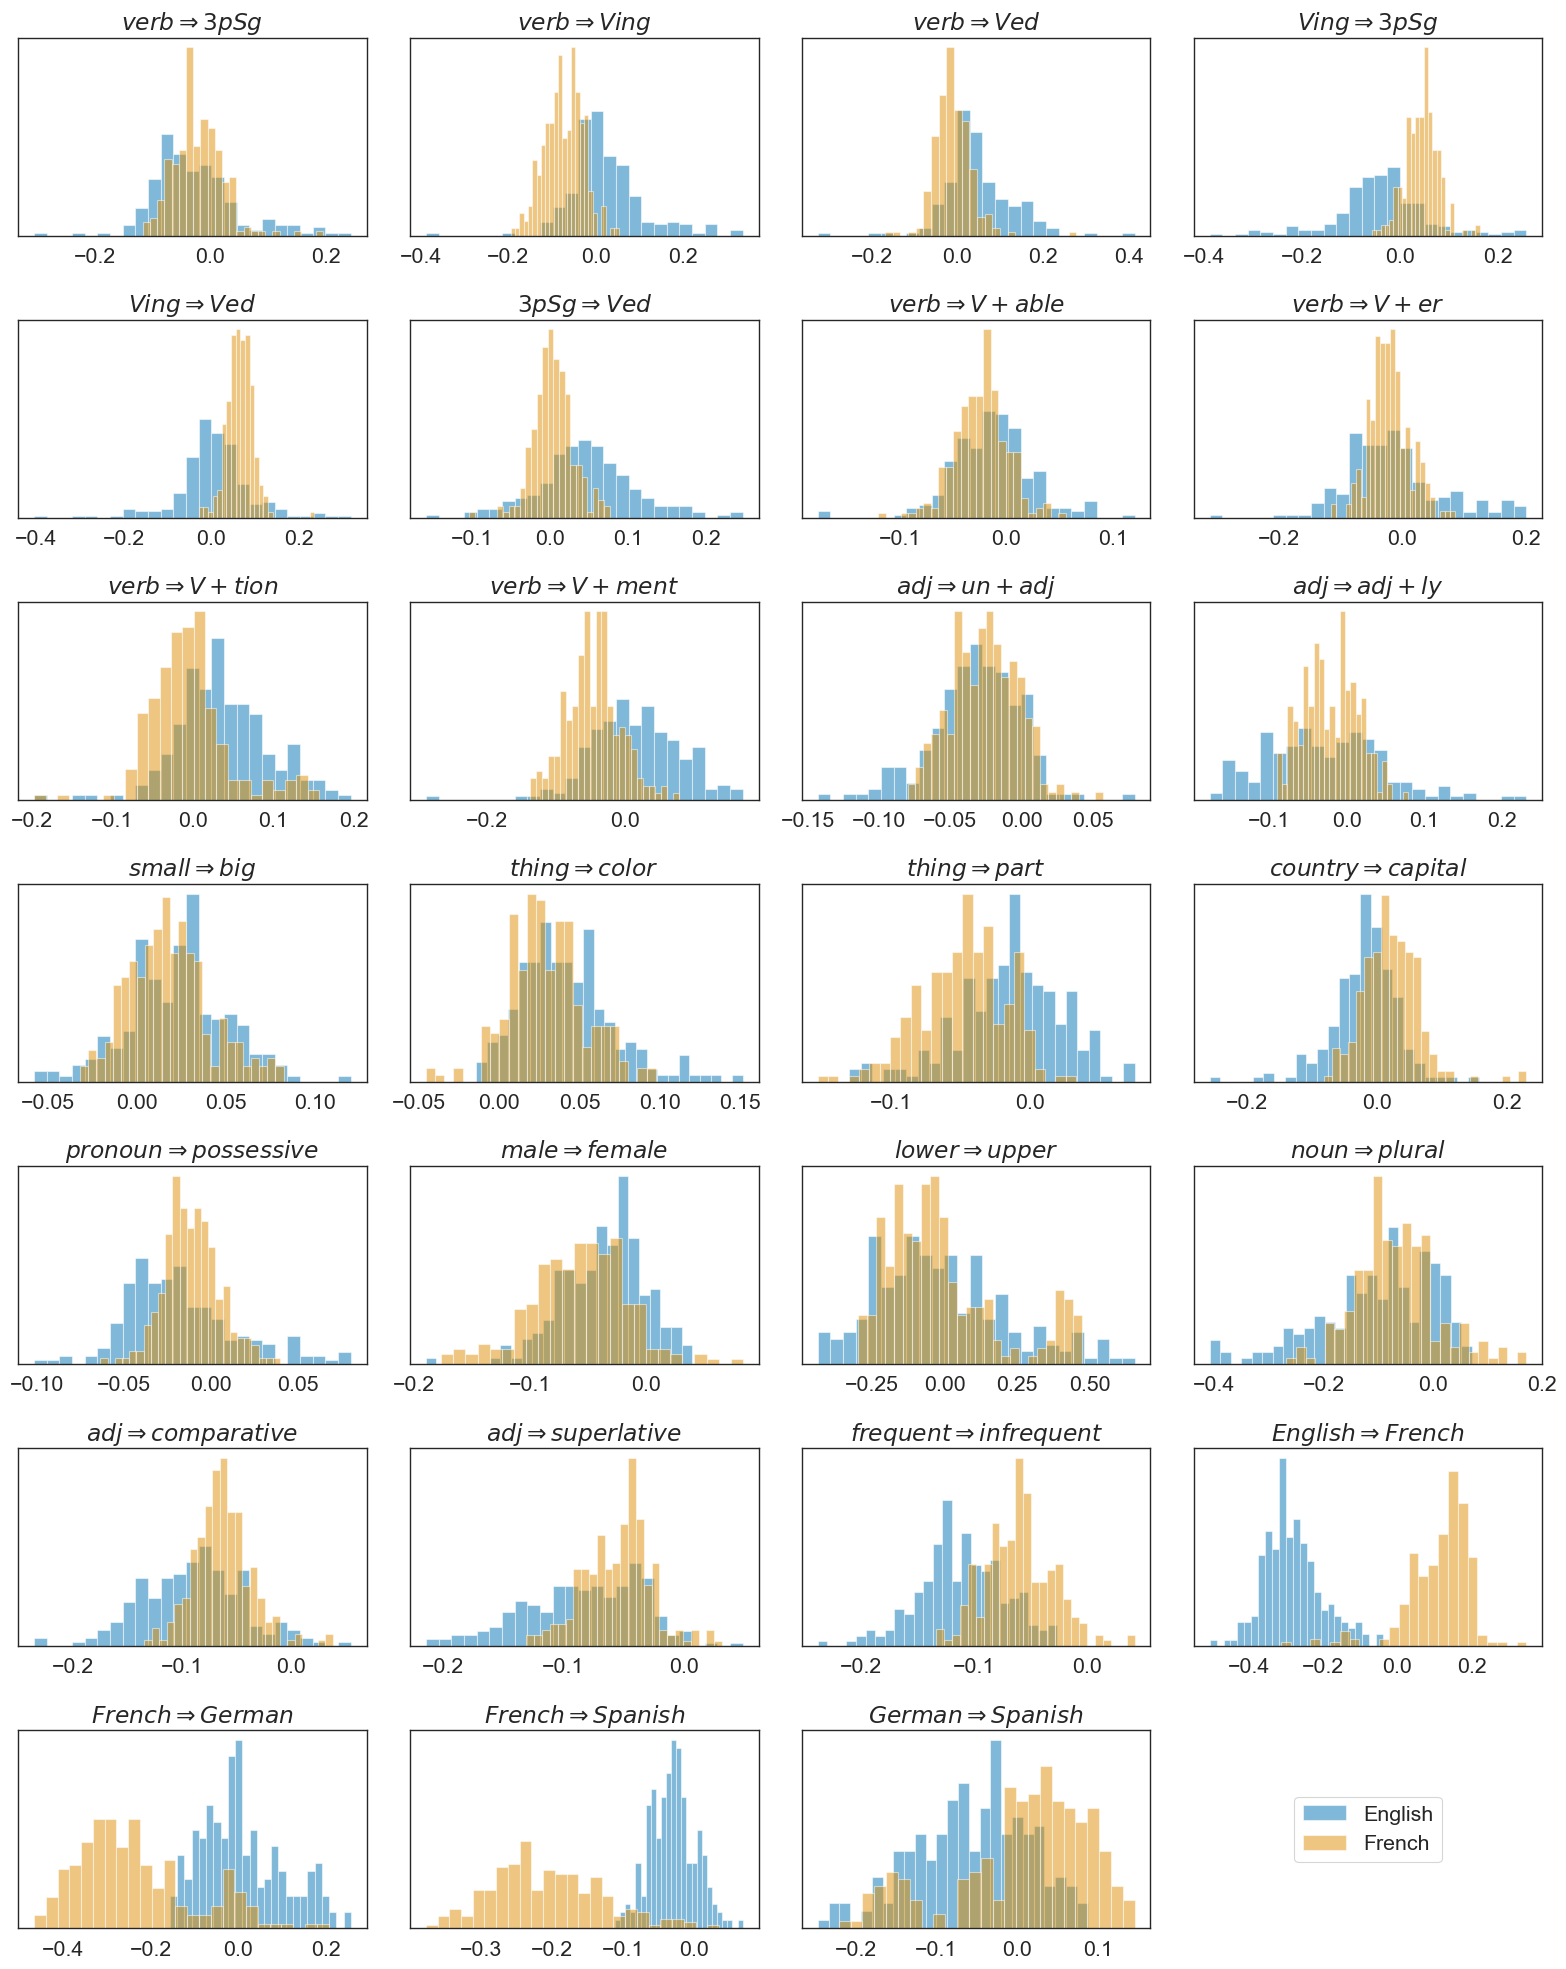

In [4]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[0])
lrg.hist_measurement(
    lambda_0 @ sqrt_Cov_gamma, 
    lambda_1 @ sqrt_Cov_gamma, 
    concept_g,
    concept_names, 
    base = "English", 
    target = "French", 
    alpha = 0.5
)

20it [01:16,  3.84s/it]


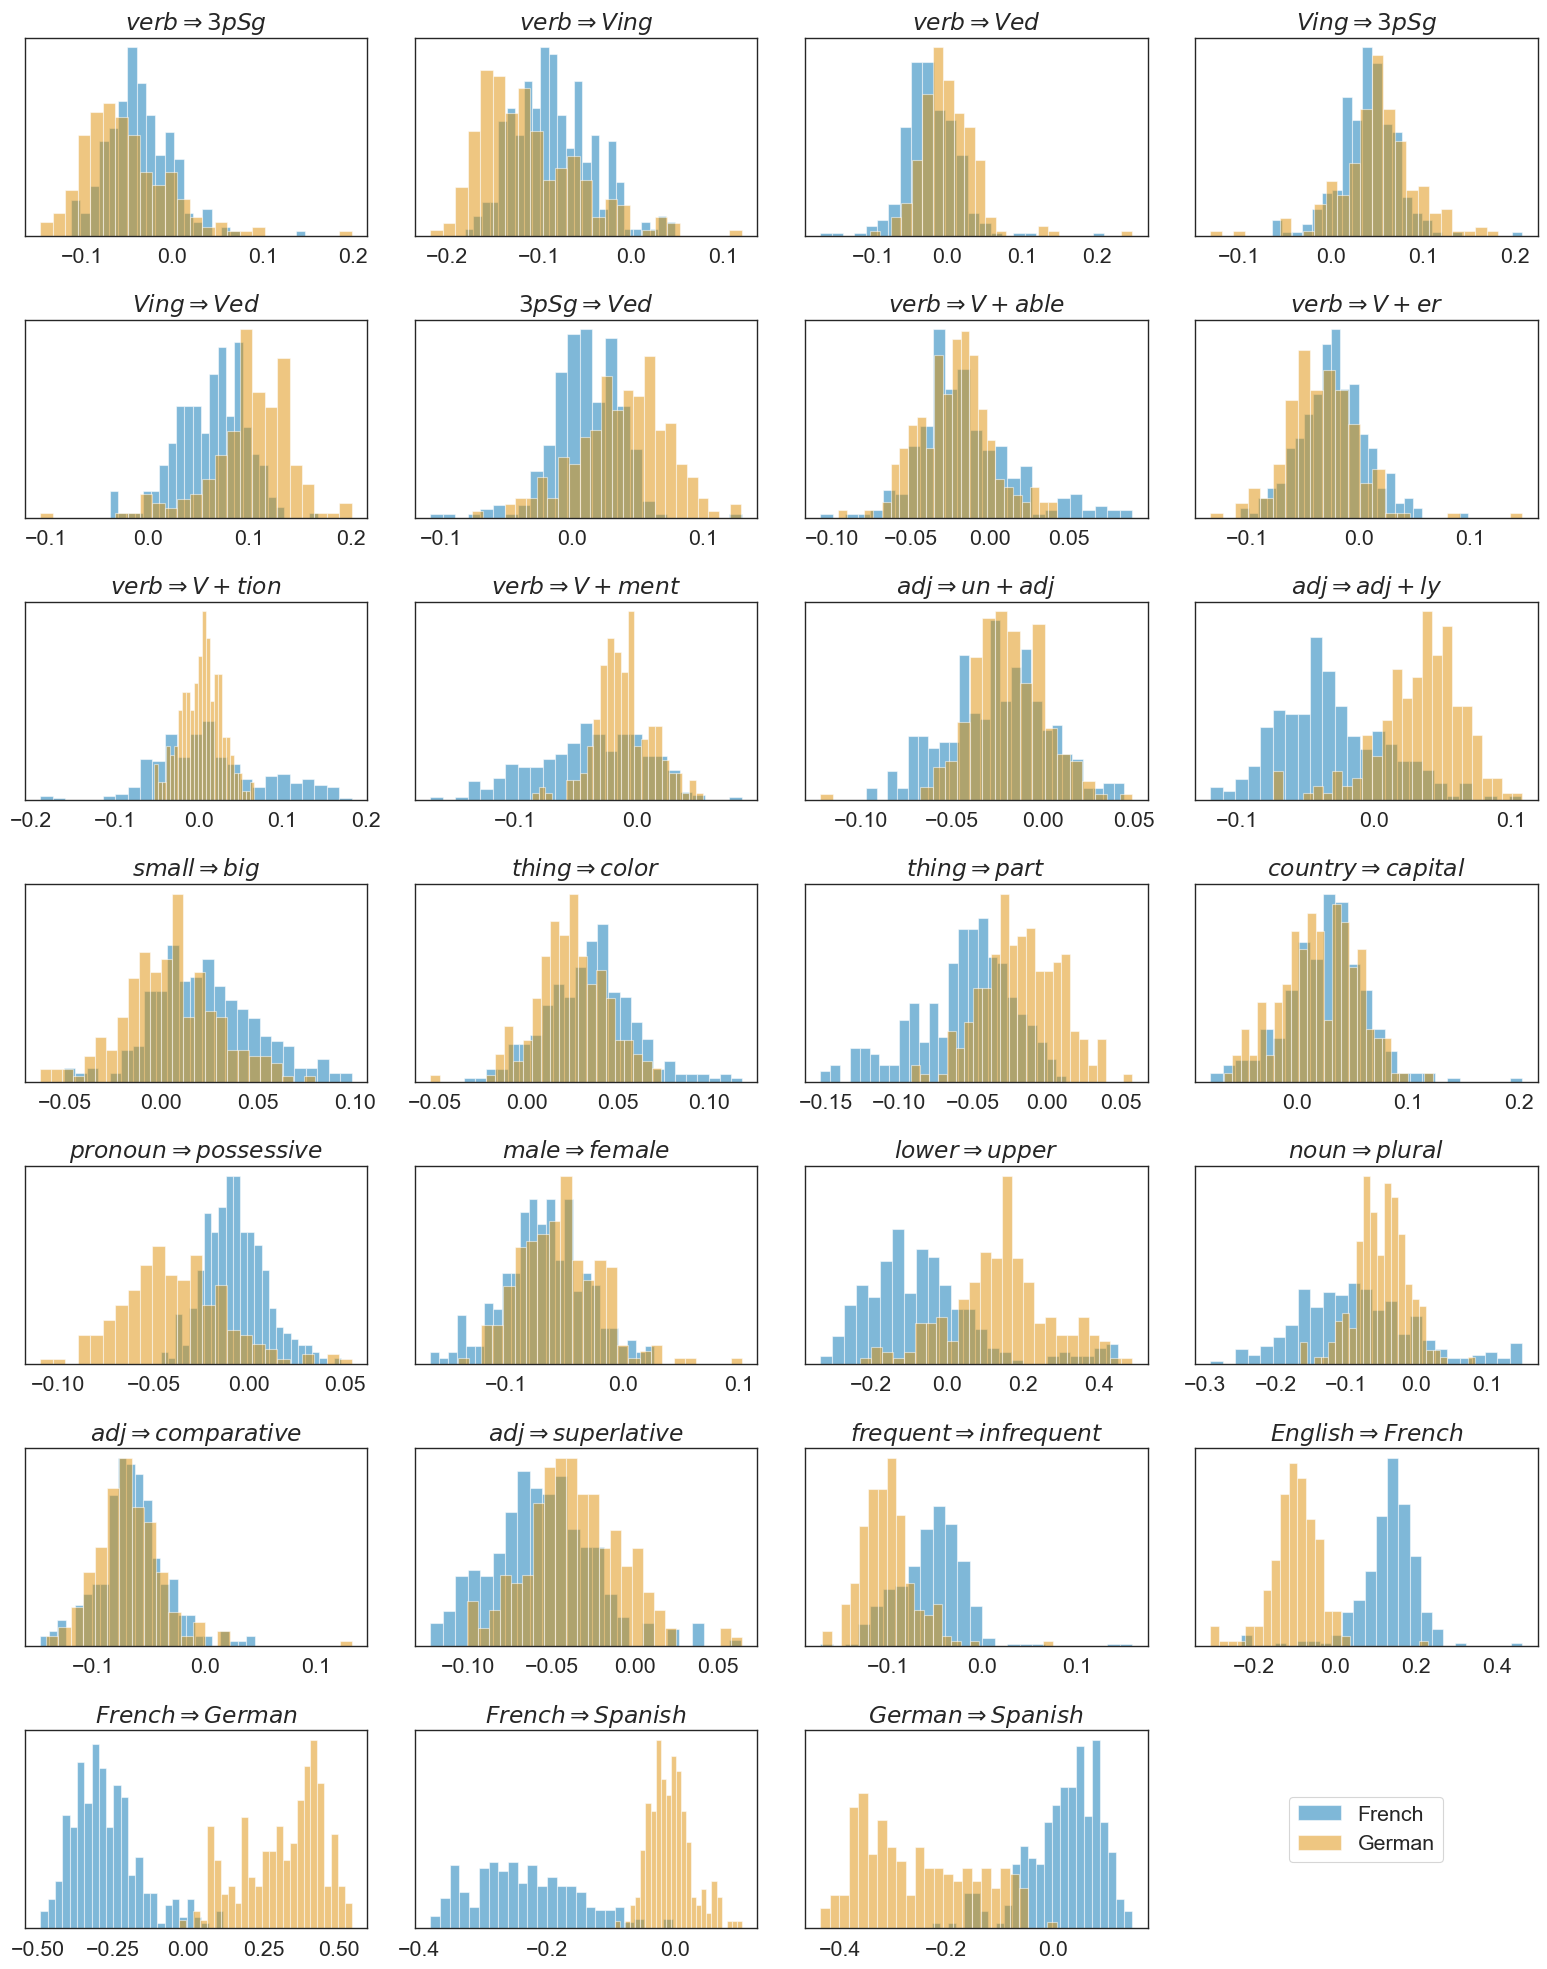

In [5]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[1])
lrg.hist_measurement(
    lambda_0 @ sqrt_Cov_gamma, 
    lambda_1 @ sqrt_Cov_gamma, 
    concept_g,
    concept_names, 
    base = "French", 
    target = "German", 
    alpha = 0.5
)

20it [00:50,  2.53s/it]


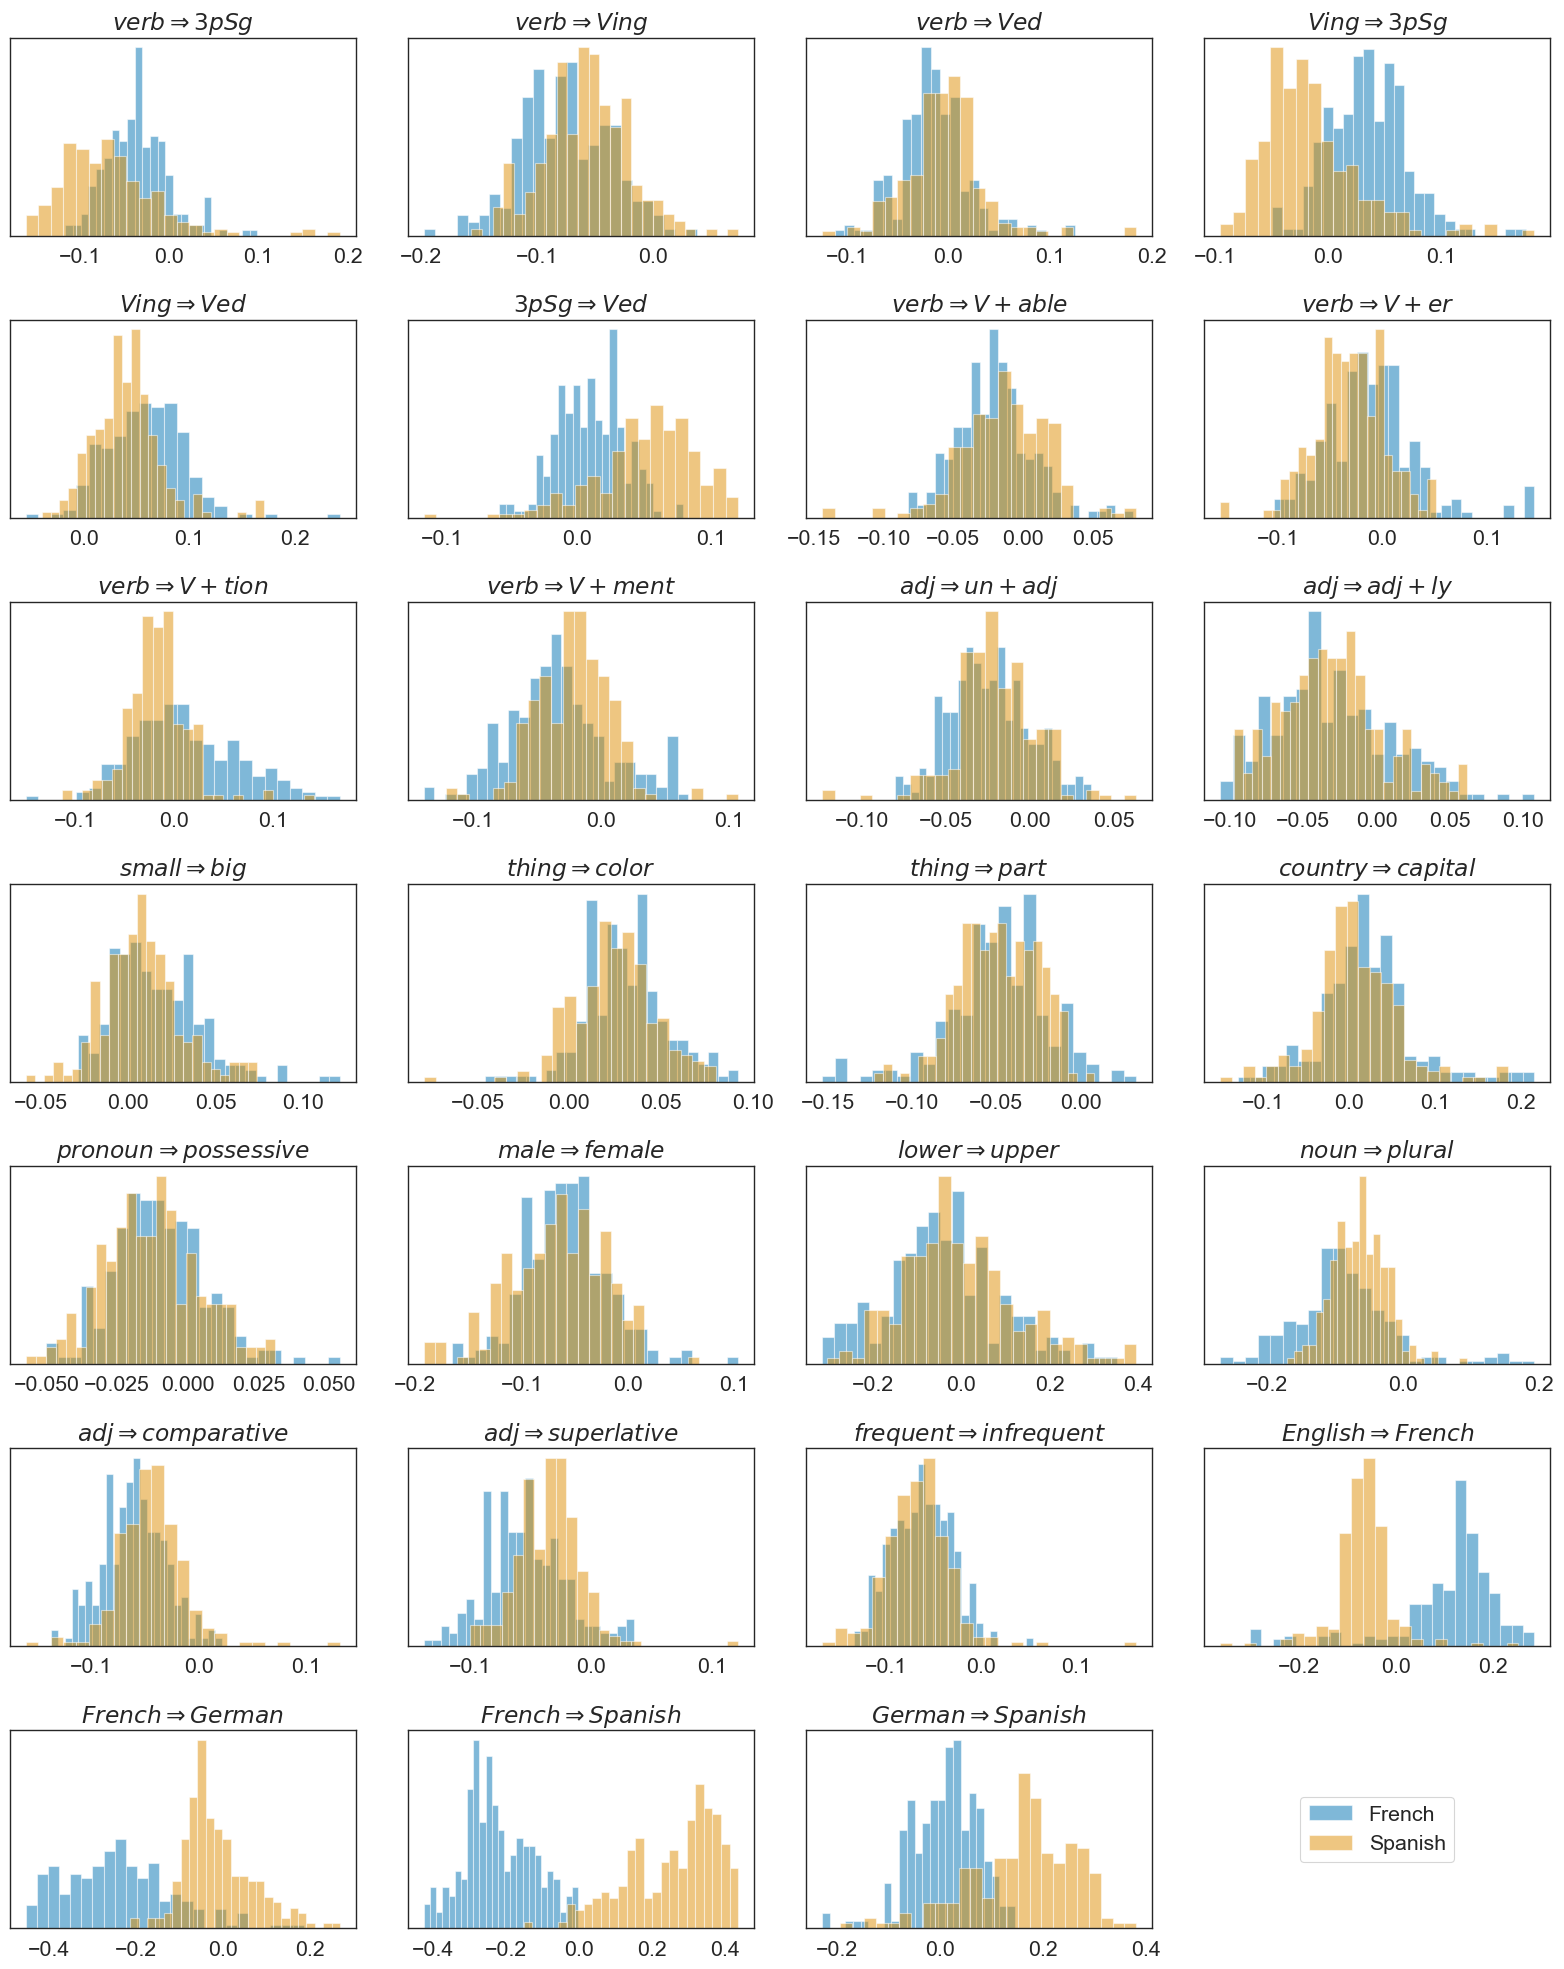

In [6]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[2])
lrg.hist_measurement(
    lambda_0 @ sqrt_Cov_gamma, 
    lambda_1 @ sqrt_Cov_gamma, 
    concept_g,
    concept_names, 
    base = "French", 
    target = "Spanish", 
    alpha = 0.5
)

20it [00:55,  2.78s/it]


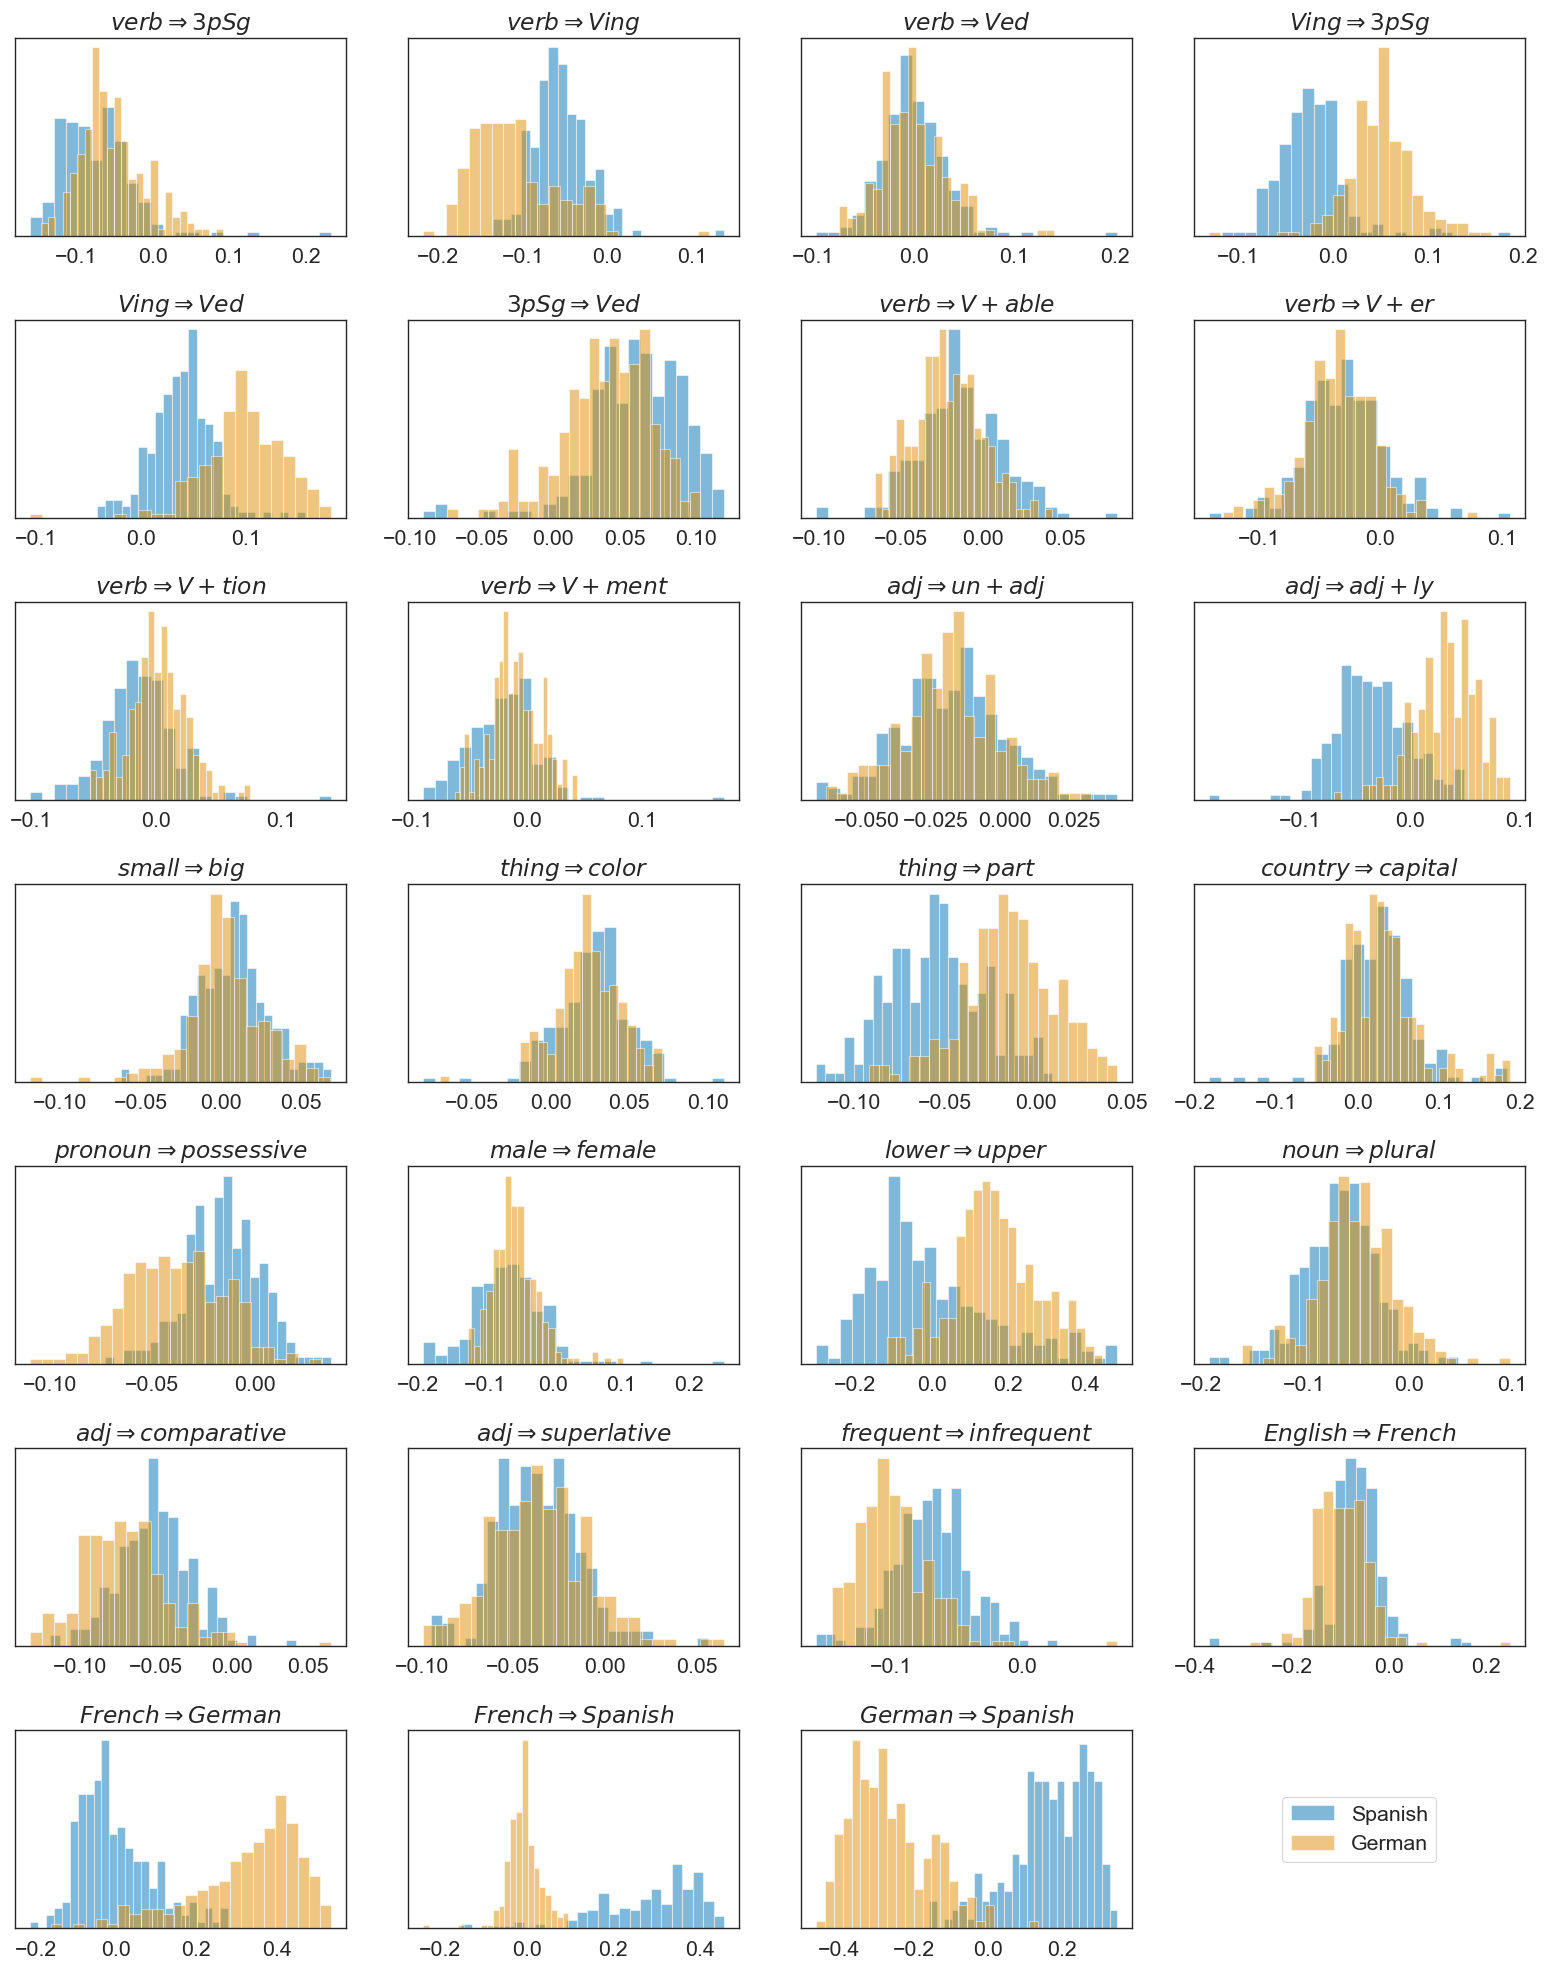

In [7]:
lambda_0, lambda_1 = lrg.get_lambda_pairs(filenames[3])
lrg.hist_measurement(
    lambda_0 @ sqrt_Cov_gamma, 
    lambda_1 @ sqrt_Cov_gamma, 
    concept_g,
    concept_names, 
    base = "Spanish", 
    target =  "German", 
    alpha = 0.5
)